# Análisis Exploratorio de Datos Homicidios - Hechos

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses de 2019, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Poblacion CABA 2019 : 3072029 Fuente: Instituti de Estadistica y Censos de la Ciudad Autónoma de Buenos Aires 

***Se importan las librerias que se van a usar***

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import locale

***Se cargan los datos del dataset ya transformado***

In [73]:
data = pd.read_excel("homicidios_listo.xlsx")

In [34]:
print(data.shape)
data.head()

(504, 21)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,Coordenadas_x,Coordenadas_y,longitud,latitud
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,-134.158453,-86.317548
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,-133.987167,-86.286895
2,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,106980.328279,100752.169158,-132.909407,-86.372763
3,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,101721.590022,93844.256566,-134.027736,-86.341536
4,2016-0009,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,...,11,-58.500959,-34.608254,MOTO-AUTO,MOTO,AUTO,96545.875921,102330.672622,-133.049127,-86.278847


#4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (Reducción en un 10 % la tasa de homicidios en siniestros viales de los últimos seis meses del 2019, comparado con el semestre anterior (enero-junio de 2019))

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual; descripción de las variables en este caso las variables relacionadas cN_VICTIMAS: Número de víctimas fatales en los homicidios.FECHA, AAAA, MM, DD: Estos indican la fecha del incidente, lo cual te permitirá analizar la temporalidad (años, meses, días).
HORA, HH: Hora del incidente. Es posible analizar patrones en horarios (diurnos, nocturnos) LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Cruce, Dirección Normalizada: Información sobre la ubicación geográfica del siniestro, importante para determinar puntos críticos. COMUNA: La comuna donde ocurrió el incidente, útil para el análisis espacial.
Coordenadas pos x, pos y: Coordenadas geográficas precisas del incidente. Estos datos te permitirán realizar un análisis espacial y ubicar zonas de mayor riesgo.
PARTICIPANTES, VICTIMA, ACUSADO: Información sobre los involucrados. Puede servir para entender patrones de responsabilidad o tipos de víctimas.

2. Análisis univariado: relación de cada variable predictora con la variable a predecir. El objetivo del análisis univariado es entender cómo cada variable predictora (en este caso, variables relacionadas con el lugar, hora, y tipo de incidente) se relaciona con la variable dependiente, que es el número de víctimas fatales. N_VICTIMAS: Se realiza un análisis descriptivo de esta variable. Mira su distribución (media, mediana, desviación estándar) para ver si hay eventos extremos (outliers) o patrones.
FECHA, HORA, TIPO_DE_CALLE, LUGAR_DEL_HECHO, COMUNA: Se analiza cómo influyen en el número de víctimas fatales. Por ejemplo, ¿hay más víctimas en ciertos meses del año? ¿Qué horas son las más peligrosas? ¿Algunos tipos de calles o zonas tienen más incidentes?
Coordenadas: Utiliza un mapa para visualizar la concentración de homicidios. Las zonas de mayor frecuencia de homicidios podrían indicar puntos críticos.
2. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir: FECHA vs N_VICTIMAS: Analizar la relación entre las fechas y el número de homicidios en siniestros viales. Examina si hay estacionalidad o tendencias de aumento o disminución de homicidios en ciertos períodos.
HORA vs N_VICTIMAS: Verifica si las horas del día tienen una correlación con el número de víctimas fatales.
TIPO_DE_CALLE vs N_VICTIMAS: Analiza si ciertos tipos de calles (por ejemplo, avenidas, calles residenciales) están asociados con un mayor número de víctimas.
COMUNA vs N_VICTIMAS: Determina si algunas comunas tienen un mayor número de homicidios en siniestros viales que otras.

# 4.1 Análisis univariable
Permite comprender las características generales de cada variable de nuestro set de datos homicidios. Iniciemos en las variables categóricas.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     504 non-null    object        
 1   N_VICTIMAS             504 non-null    int64         
 2   FECHA                  504 non-null    datetime64[ns]
 3   AAAA                   504 non-null    int64         
 4   MM                     504 non-null    int64         
 5   DD                     504 non-null    int64         
 6   HORA                   504 non-null    object        
 7   HH                     504 non-null    int64         
 8   LUGAR_DEL_HECHO        504 non-null    object        
 9   TIPO_DE_CALLE          504 non-null    object        
 10  Dirección Normalizada  504 non-null    object        
 11  COMUNA                 504 non-null    int64         
 12  pos x                  504 non-null    float64       
 13  pos y

### **Análisis de las variables categóricas** 

In [75]:
data.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Dirección Normalizada', 'COMUNA',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO',
       'Coordenadas_x', 'Coordenadas_y', 'longitud', 'latitud'],
      dtype='object')

In [76]:
data = data.rename(columns={ 'Dirección Normalizada': 'DIRECCIÓN DEL HECHO'})


In [77]:
# Reemplazar caracteres no imprimibles en todo el DataFrame
import re

def limpiar_caracteres(texto):
    if isinstance(texto, str):
        return re.sub(r'[^\x00-\x7F]+', '', texto)  # Eliminar cualquier carácter no ASCII
    return texto

# Aplicar la función a todas las columnas de tipo objeto (string)
data = data.apply(lambda col: col.map(limpiar_caracteres) if col.dtype == 'object' else col)


**Se grafica para una mejor visualización**

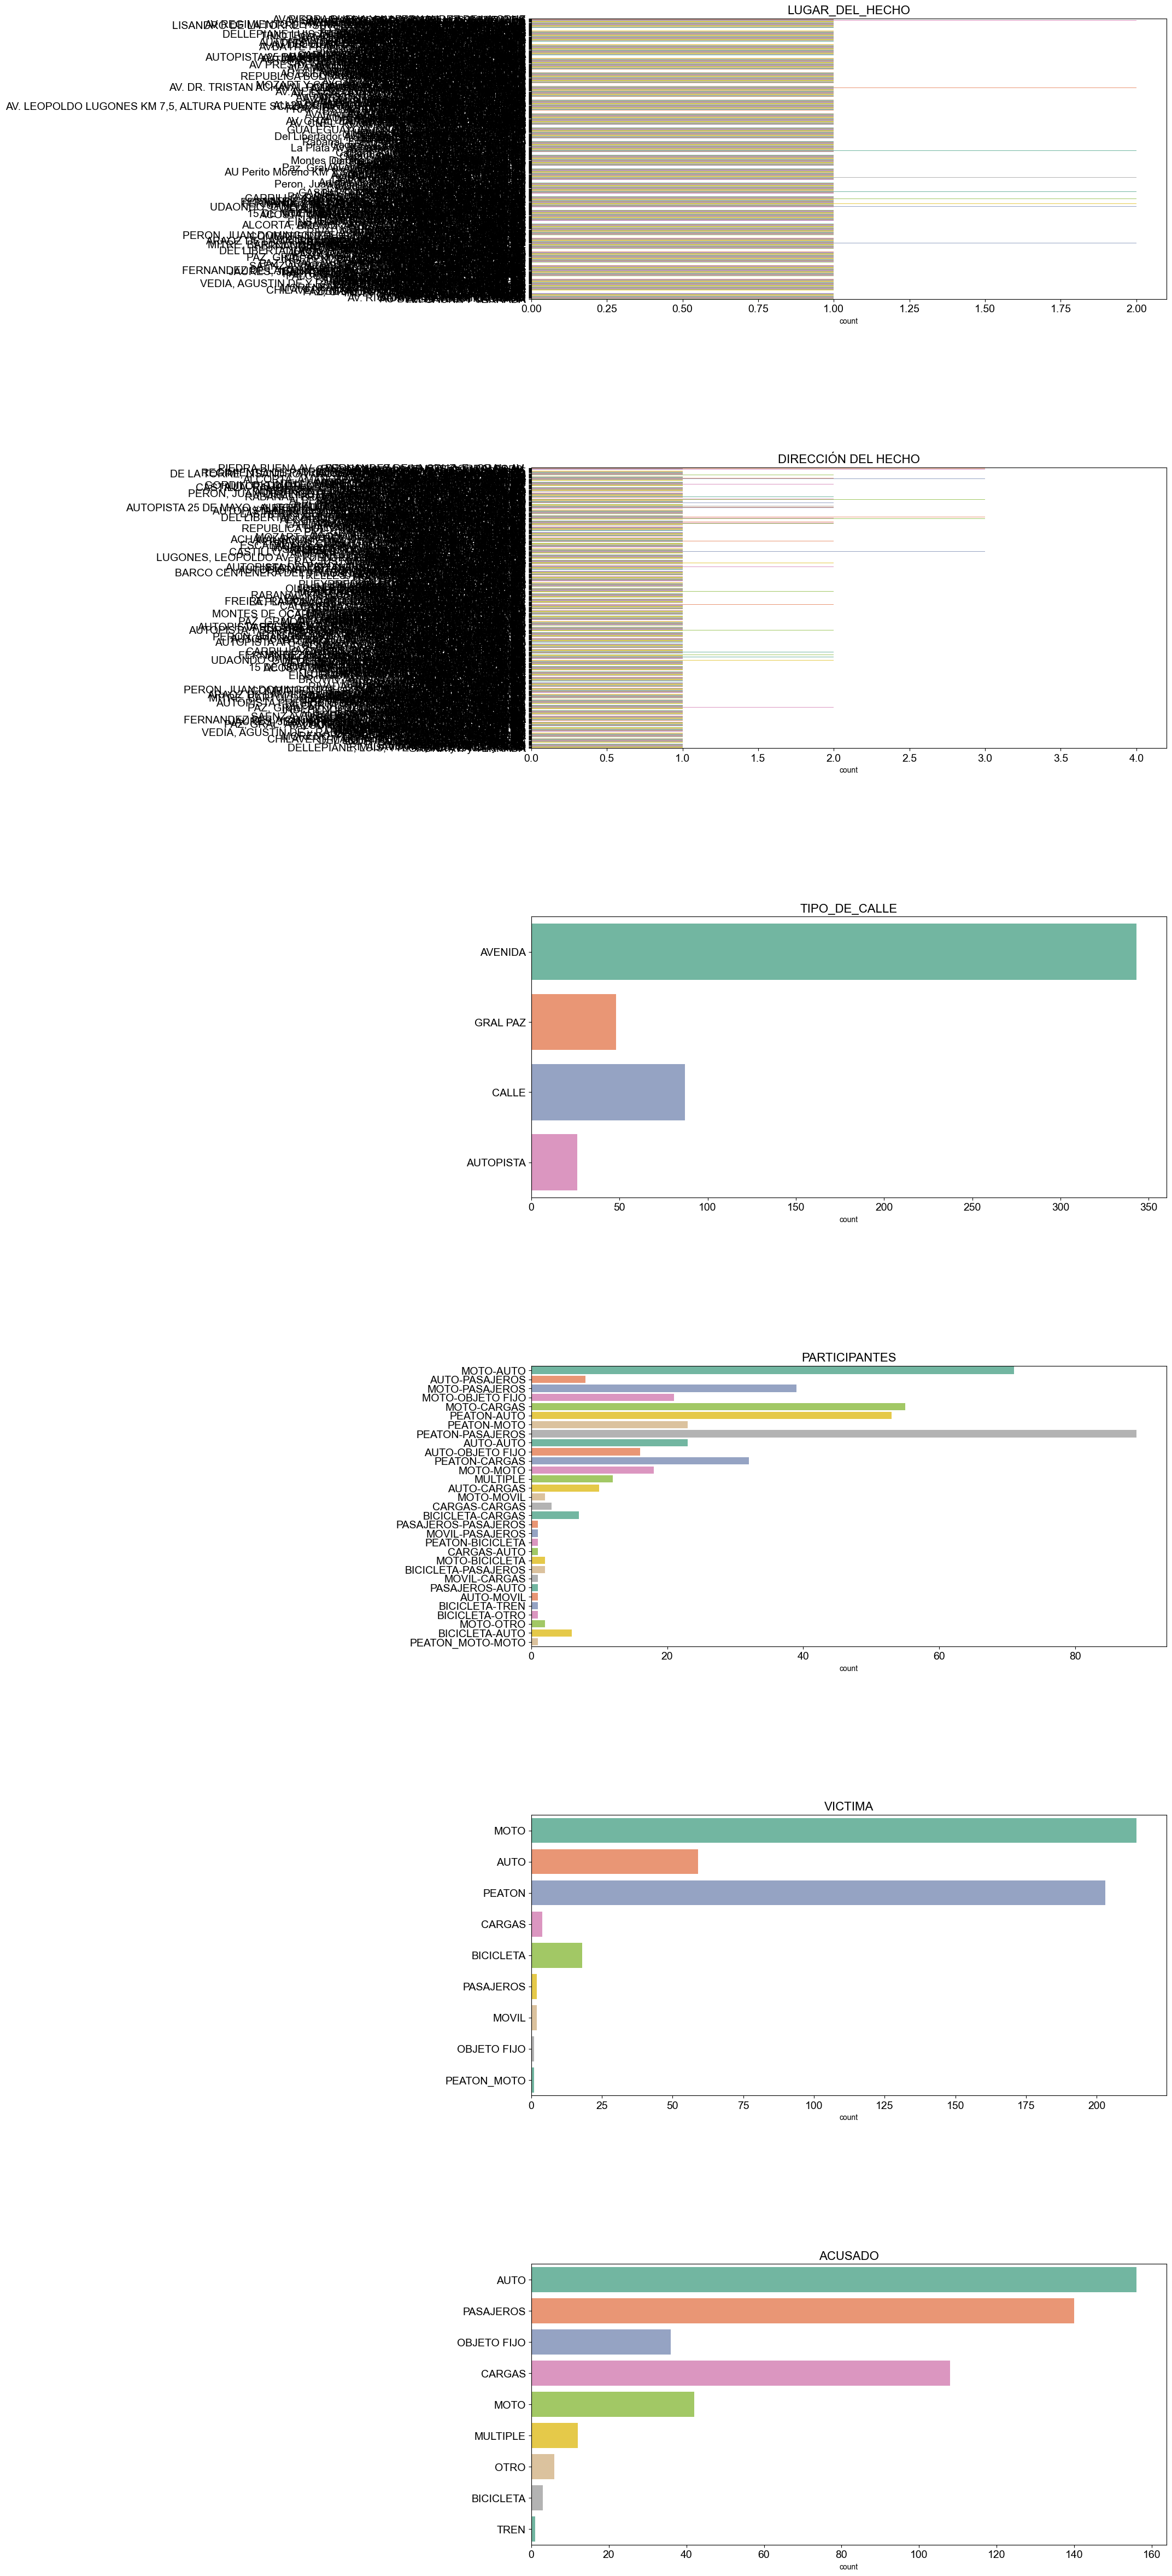

In [78]:
# Visualización de datos
plt.rcParams['font.family'] = 'Arial'
col_cat = ['LUGAR_DEL_HECHO', 'DIRECCIÓN DEL HECHO', 'TIPO_DE_CALLE', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO']
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(15, 60))  

fig.subplots_adjust(hspace=0.6) 
# Iteramos sobre cada una de las variables categóricas
for i, col in enumerate(col_cat):
    sns.countplot(y=col, data=data, ax=ax[i], hue=col, palette='Set2', dodge=False)  
    ax[i].set_title(col, fontsize=16)  
    ax[i].set_ylabel('')  
    ax[i].tick_params(axis='y', labelsize=14) 
    ax[i].tick_params(axis='x', labelsize=14)  

# Mostrar el gráfico
plt.show()


**Análisis de variable 'DIRECCIÓN DEL HECHO'**

In [79]:
# Se saca las frecuencias de accidentalidad en la variable 
lugar_frecuencias = data['DIRECCIÓN DEL HECHO'].value_counts()
lugar_frecuencias

DIRECCIÓN DEL HECHO
PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.         4
PAZ, GRAL. AV. y DEL LIBERTADOR AV.               3
27 DE FEBRERO AV. y ESCALADA AV.                  3
INDEPENDENCIA AV. y CEVALLOS, VIRREY              3
ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO    3
                                                 ..
FERNANDEZ DE LA CRUZ, F., GRAL. AV. y LARRAYA     1
ALBARIO y ARGENTINA AV.                           1
VIEYTES y CRUZ, OSVALDO AV.                       1
PAVON AV. y TREINTA Y TRES ORIENTALES             1
GAONA AV. y TERRADA                               1
Name: count, Length: 463, dtype: int64

**Se grafica para una mejor visualización**

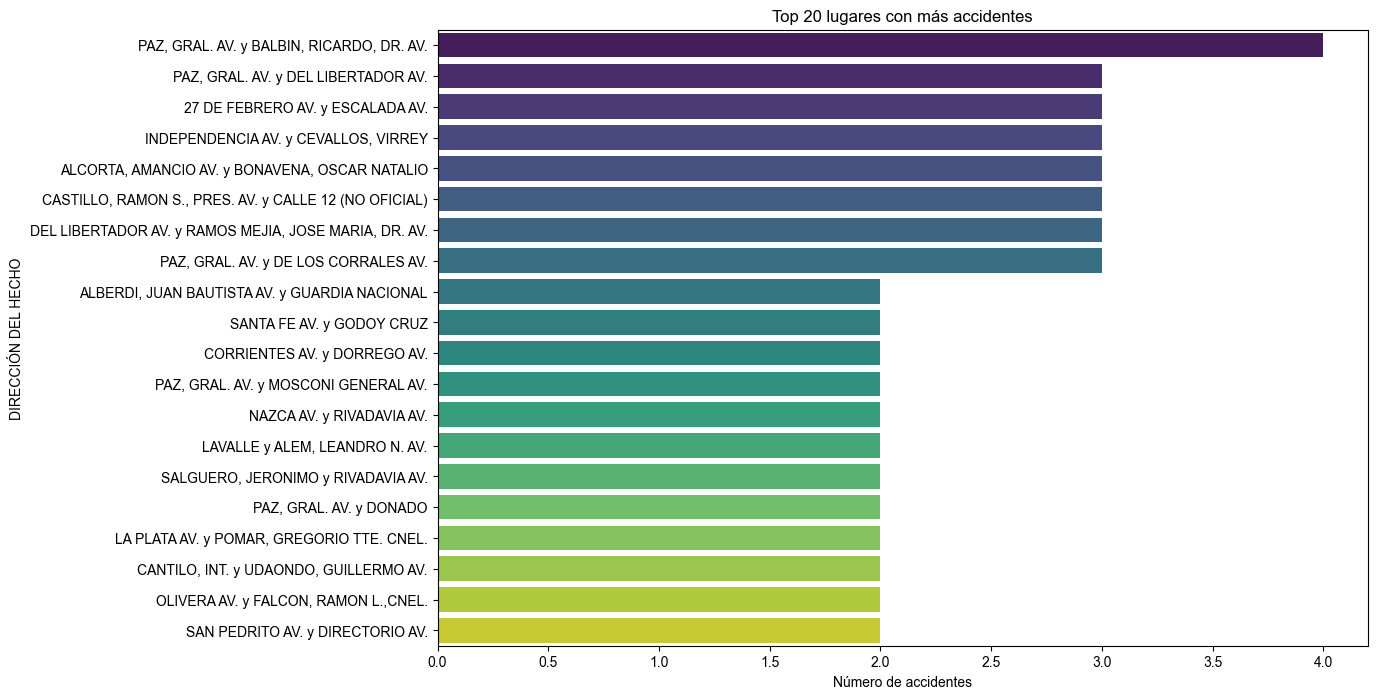

In [80]:
# Se sacar las frecuencias de accidentalidad en la variable 
lugar_frecuencias = data['DIRECCIÓN DEL HECHO'].value_counts()
top_lugares = data['DIRECCIÓN DEL HECHO'].value_counts().nlargest(20)  # Los 20 lugares más frecuentes

# Graficar sin advertencias
plt.figure(figsize=(12,8))
sns.barplot(x=top_lugares.values, y=top_lugares.index, hue=top_lugares.index, palette='viridis', legend=False)
plt.title('Top 20 lugares con más accidentes')
plt.xlabel('Número de accidentes')
plt.ylabel('DIRECCIÓN DEL HECHO')
plt.show()



**Análisis de las variables categóricas graficadas:**
Niveles de cada variable de interés:
- 'LUGAR_DEL_HECHO': cuenta con 493 diferentes subniveles, las cuales no se pueden visualizar bien, Se elimina está la columna tiende a ser redundante con la columna "Dirección Normalizada"
- "DIRECCIÓN DEL HECHO": Se grafica los 20 lugares con más accidentes 
- 'TIPO_DE_CALLE': 4 diferentes subniveles. Esta desbalanceado. Avenida, Gral Paz, Calle y Autopista la mayor cantidad de datos lo tiene el subnivel Avenida.
- 'PARTICIPANTES': 31 subniveles. Los subnivles con el mayor número de victimas son Moto-Auto, Peaton-pasajeros.
- 'VICTIMA': 9 subniveles. Esta desbalanceado. Los que cuentan con el mayor número de victimas es peaton y moto.
- 'ACUSADO': 9 subniveles. Esta desbalanceado. Auto, Pasajero y cargas, son los que cuentan con mayor numero de personas acusadas.

### **Análisis de las variables numéricas** 

In [81]:
data.describe()


,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,COMUNA,pos x,pos y,Coordenadas_x,Coordenadas_y,longitud,latitud
count,504.000000,504,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1.029762,2018-09-01 19:48:34.285714176,2018.160714,6.607143,16.192460,11.771825,7.438492,-58.441261,-34.619358,102021.338464,101098.377823,-133.030881,-86.328827
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,93889.867899,91571.233073,-134.388840,-86.400321
25%,1.000000,2017-04-17 12:00:00,2017.000000,3.000000,9.000000,6.000000,4.000000,-58.474718,-34.643918,98952.411087,98374.382047,-133.428256,-86.358660
50%,1.000000,2018-06-28 12:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.621569,101721.590022,100851.104641,-132.983249,-86.328143
75%,1.000000,2019-12-18 00:00:00,2019.000000,10.000000,23.250000,18.000000,11.000000,-58.403634,-34.597180,105473.759557,103556.990564,-132.614252,-86.302140
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654,109831.098614,110496.053085,-131.845158,-86.256917
std,0.181410,NaN,1.663538,3.572096,8.689054,6.855330,4.391862,0.045256,0.035866,4150.367339,3978.707424,0.565783,0.036389


Se eliminaran columna que para el análisis no aportan información a la premisa inicial, las columnas que se  consideran  irrelevanes son "ID", "Coordenadas_x",	"Coordenadas_y" , "longitud" y 	"latitud".


In [82]:
data.drop(columns=["ID", "Coordenadas_x",	"Coordenadas_y" , "longitud", "latitud"],inplace=True)
data.columns

Index(['N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'DIRECCIÓN DEL HECHO', 'COMUNA',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

###   **Variable numérica:"COMUNA"**

In [83]:
data[['COMUNA']].describe()

,COMUNA
count,504.000000
mean,7.438492
std,4.391862
min,1.000000
25%,4.000000
50%,8.000000
75%,11.000000
max,15.000000


**Se grafica para una mejor visualización**

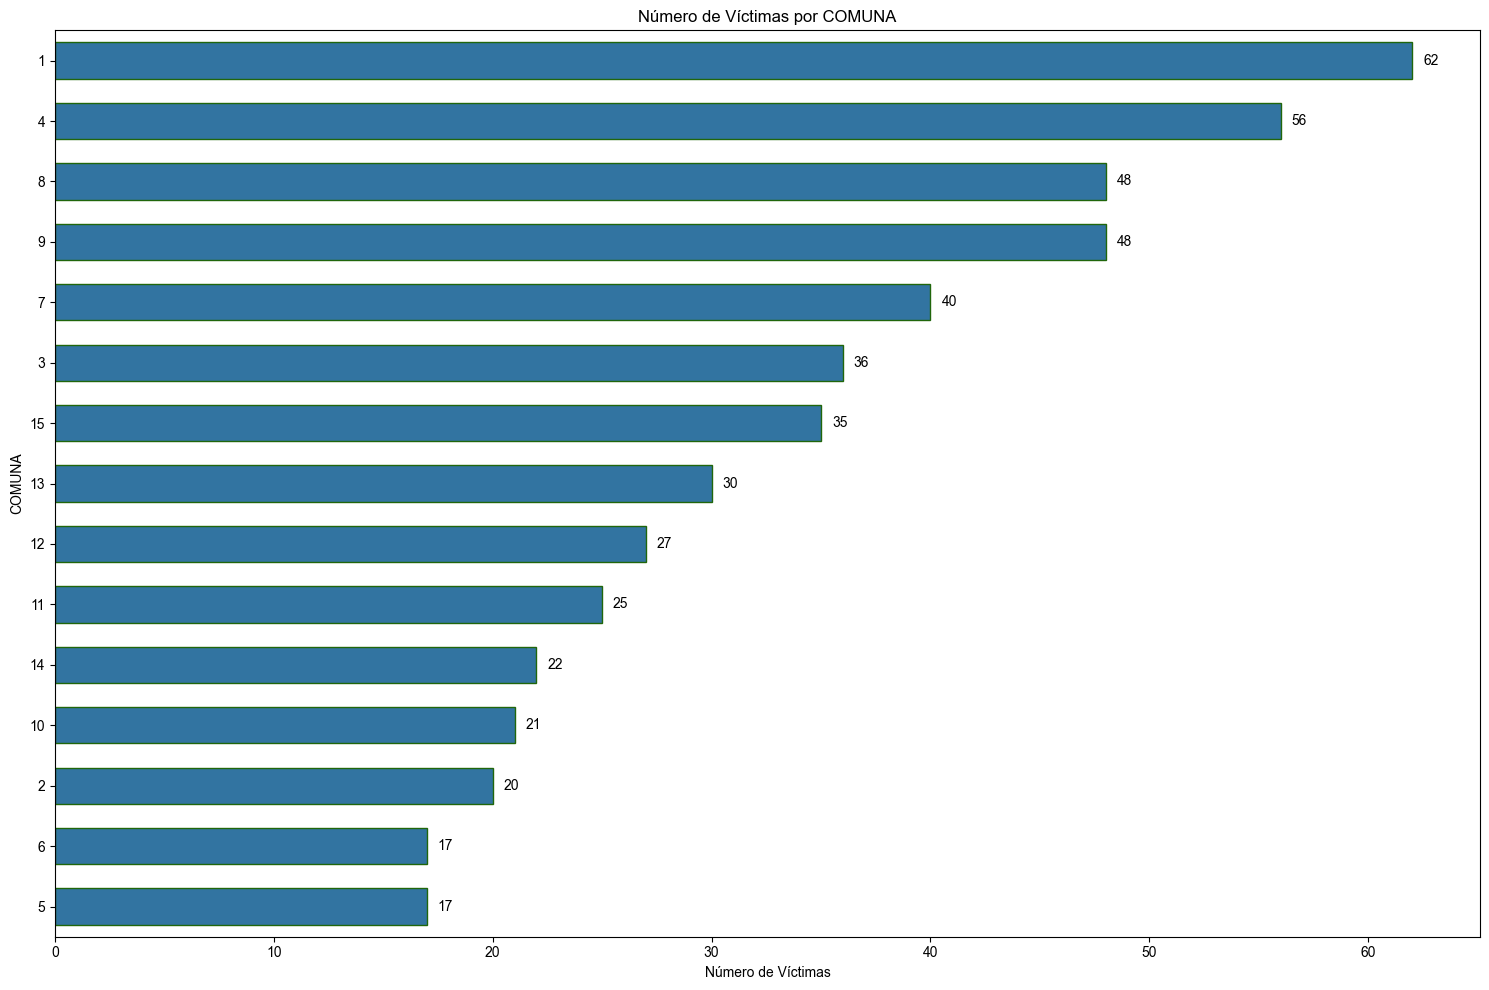

In [84]:
plt.figure(figsize=(15, 10)) 
ax = sns.countplot(y='COMUNA', data=data, edgecolor='#20660b', order=data['COMUNA'].value_counts().index, width=0.6)
plt.title('Número de Víctimas por COMUNA')
plt.xlabel('Número de Víctimas')
plt.ylabel('COMUNA')
for p in ax.patches:
    ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,  
            f'{int(p.get_width())}', 
            fontsize=10, color='black', ha='left', va='center')  
plt.tight_layout()
plt.show()



- La mayor cantidad de victimas se encuentran en el orden de la comuna 1, 4, 8 y 9.
- La desviación estandar de esta variable es mayor los que significa que los datos están más dispersos o alejados de la media, lo que implica que hay mayor variabilidad entre los valores. Un valor alto de desviación estándar indica que los datos son más heterogéneos.

###   **Variable numérica:"N_VICTIMAS"**

**Se grafica para una mejor visualización**

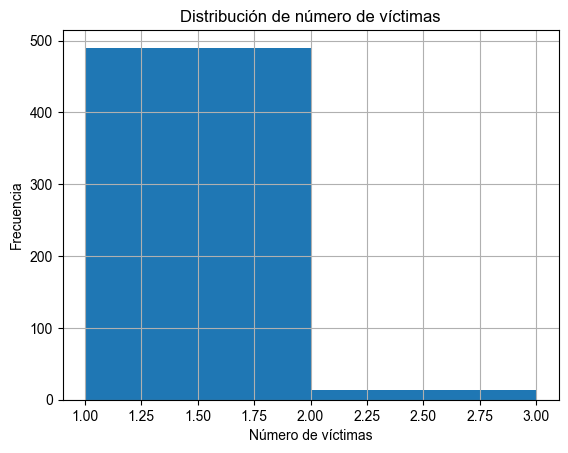

count    504.000000
mean       1.029762
std        0.181410
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: N_VICTIMAS, dtype: float64

In [85]:
homicidios = data
homicidios['N_VICTIMAS'].hist(bins=range(1, max(homicidios['N_VICTIMAS']) + 1))
plt.title('Distribución de número de víctimas')
plt.xlabel('Número de víctimas')
plt.ylabel('Frecuencia')
plt.show()
data["N_VICTIMAS"].describe()


- La mayor cantidad de victimas por accidentes es de 1 sola persona 
- Los datos son consistentes por que la desviacion estandar es baja lo que indica que los datos tienden a estar cerca de la media, lo que significa que hay poca variabilidad entre los valores del conjunto de datos. 
- En más de 450 siniestros viales por lo menos hay una victima fatal y en muy pocos casos hay dos o tres victimas fatales  en sólo un siniestro
*******



### **Análizar las variables relacionadas con el tiempo** 

### **Siniestros por año**

In [86]:
data = data.rename(columns={ 'AAAA': 'AÑO'})

In [87]:
eventos_año= data['AÑO'].value_counts().sort_index()
print(eventos_año)

AÑO
2016    104
2017     95
2018    111
2019     69
2020     60
2021     65
Name: count, dtype: int64


**Se grafica para una mejor visualización**

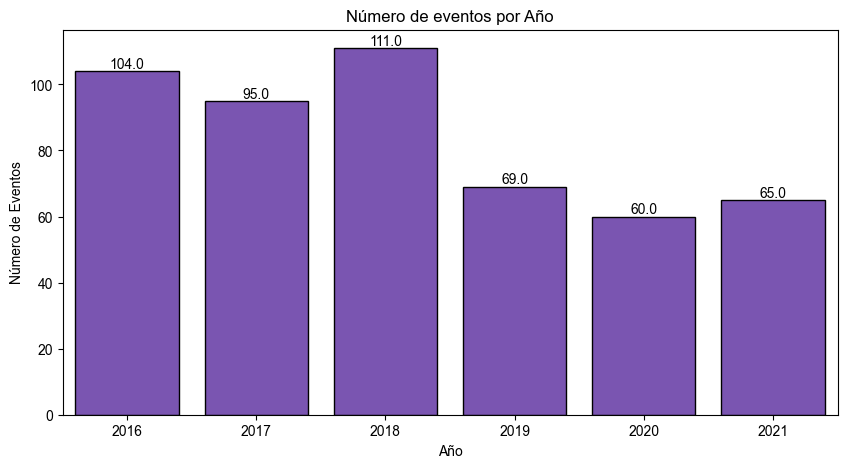

count     504.000000
mean     2018.160714
std         1.663538
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: AÑO, dtype: float64

In [88]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='AÑO', data=data, color='#7746c0', edgecolor='black')

# Añadir etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Eventos')
plt.show()
data['AÑO'].describe()

**AÑO:** La media de 2018.16 indica que, en promedio, los eventos están más concentrados en el año 2018. La mediana de 2018 refuerza esta afirmación, sugiriendo que la mitad de los eventos se produjeron en 2018. La desviación estándar de 1.66 muestra una variabilidad moderada en la ocurrencia de eventos a través de los años, indicando que, aunque la mayoría de los eventos se concentran en 2018, también hay una presencia notable de eventos en 2016, 2017, 2019 y 2021.

### **Siniestros por mes**

In [89]:
data = data.rename(columns={ 'MM': 'MES'})

In [90]:
eventos_mes= data['MES'].value_counts().sort_index()
print(eventos_mes)

MES
1     48
2     41
3     41
4     29
5     46
6     43
7     37
8     47
9     35
10    38
11    45
12    54
Name: count, dtype: int64


**Se grafica para una mejor visualización**

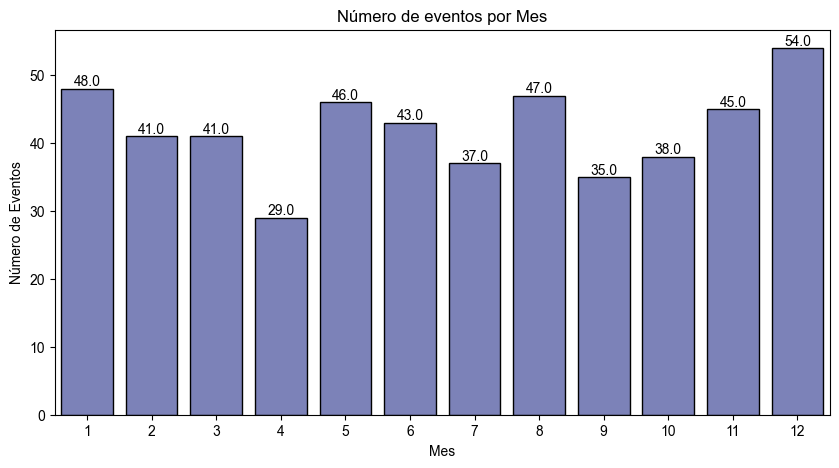

count    504.000000
mean       6.607143
std        3.572096
min        1.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: MES, dtype: float64

In [91]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='MES', data=data, color='#727ac2',edgecolor='black')

# Añadir etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Eventos')
plt.show()
data['MES'].describe()

MES: La media de 6.61 sugiere que, en promedio, los eventos tienden a ocurrir alrededor de julio (mes 7), la mediana de 7 confirma que al menos la mitad de los eventos ocurrieron en julio o en meses posteriores, la desviación estándar de 3.57 muestra una variabilidad considerable en la ocurrencia de eventos a lo largo de los meses. Esto indica que, aunque muchos eventos están concentrados en ciertos meses, hay una amplia gama de meses con menor o mayor actividad.

### **Siniestros por día**

In [92]:
data = data.rename(columns={ 'DD': 'DIA'})

In [93]:
eventos_dia= data['DIA'].value_counts().sort_index()
print(eventos_dia)

DIA
1     13
2     16
3     18
4     13
5     15
6     11
7     16
8     12
9     20
10    16
11    19
12    19
13    15
14    20
15    17
16    14
17    22
18    15
19    17
20    18
21    15
22    18
23    19
24    14
25    15
26    15
27    18
28    23
29    17
30    13
31    11
Name: count, dtype: int64


**Se grafica para una mejor visualización**

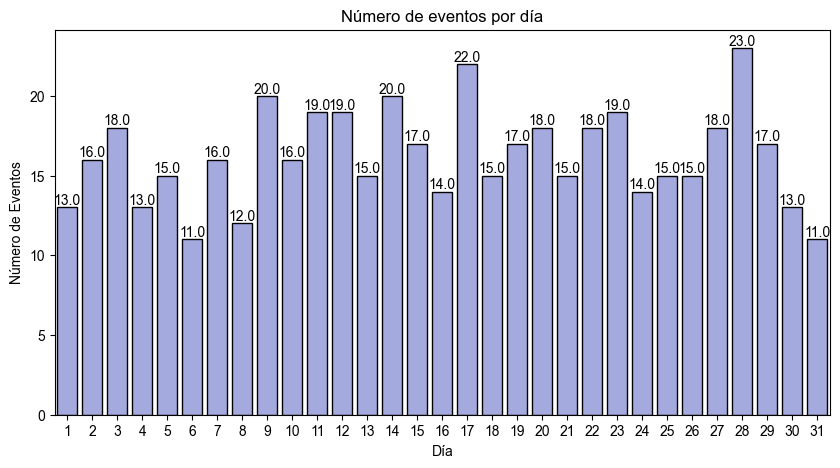

count    504.000000
mean      16.192460
std        8.689054
min        1.000000
25%        9.000000
50%       16.000000
75%       23.250000
max       31.000000
Name: DIA, dtype: float64

In [94]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='DIA', data=data, color='#9ba2e8', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por día')
plt.xlabel('Día')
plt.ylabel('Número de Eventos')
plt.show()
data['DIA'].describe()

**DIA:** La media de 16.19 indica que, en promedio, los eventos ocurren alrededor de la mitad del mes (16 días), sugiriendo una distribución relativamente equilibrada a lo largo del mes. La desviación estándar de 8.69 indica una variabilidad considerable en la distribución de eventos a lo largo de los días del mes. Esto significa que aunque muchos eventos ocurren a mediados del mes, hay una significativa cantidad de eventos también al principio y al final.

**********
**********

# 4.2 Análisis Bivariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ( Fecha, hora, tipo de calle, dirección del hecho, participantes, victimas,acusado y comuna) y la variable dependiente

#### **Análisis de la relación entre la variable numérica (COMUNA) y la variable N_VICTIMAS**

**Se grafica para una mejor visualización**

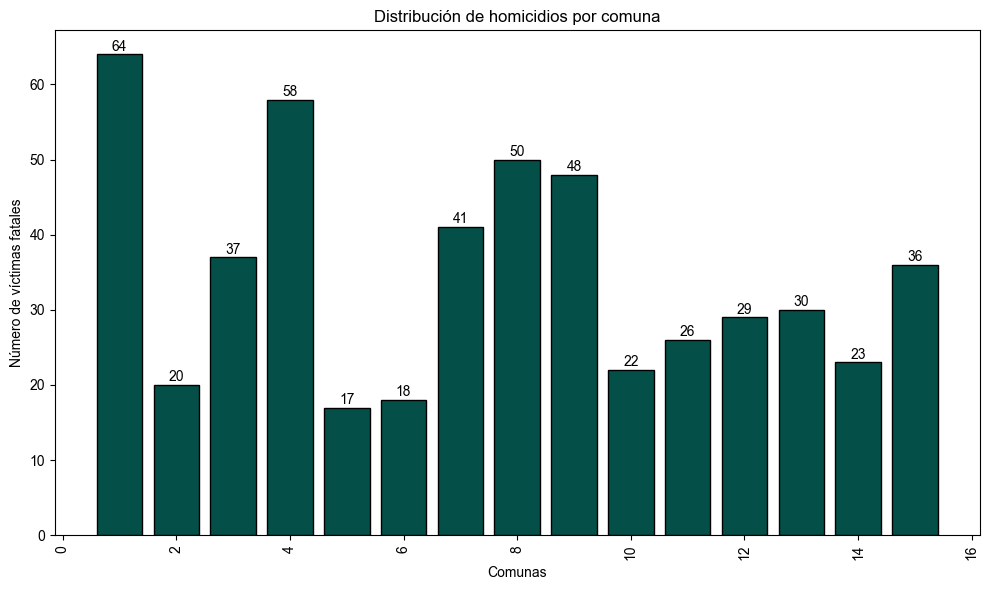

In [95]:
# Agrupar homicidios por comuna
homicidios_por_comuna = homicidios.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(homicidios_por_comuna['COMUNA'], homicidios_por_comuna['N_VICTIMAS'], color='#045049', edgecolor='black')
# Añadir etiquetas y título
plt.xlabel('Comunas')
plt.ylabel('Número de víctimas fatales')
plt.title('Distribución de homicidios por comuna')
# Añadir etiquetas de los valores encima de cada barra
for i in range(len(homicidios_por_comuna)):
    plt.text(x=homicidios_por_comuna['COMUNA'][i], 
             y=homicidios_por_comuna['N_VICTIMAS'][i] + 0.5,
             s=f'{homicidios_por_comuna["N_VICTIMAS"][i]}', 
             ha='center') 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [96]:
total_victimas = homicidios['N_VICTIMAS'].sum()
victimas_comunas_destacadas = homicidios[homicidios['COMUNA'].isin([1, 4, 8, 9])]['N_VICTIMAS'].sum()
porcentaje = (victimas_comunas_destacadas / total_victimas) * 100
print(porcentaje)


42.38921001926782


En las comunas 1, 4, 8 y 9 es donde más se han presentado victimas fatales, en comparación con las otras comunas. Del total del dataset podemos concliur a que aportan el 42.39%. 
*******

####  **Relación Variables de Tiempo - Variable Dependiente N_VICTIMAS** 

FECHA: Se revisara la cantidad de victimas por semestres de cada año, por mes y dia de la semana 
HORA: Se agruparan en  horas laborales y no laborales para el análisis

**Análisis la relación entre la variable temporal "AÑO" y la variable  "N_VICTIMAS"**

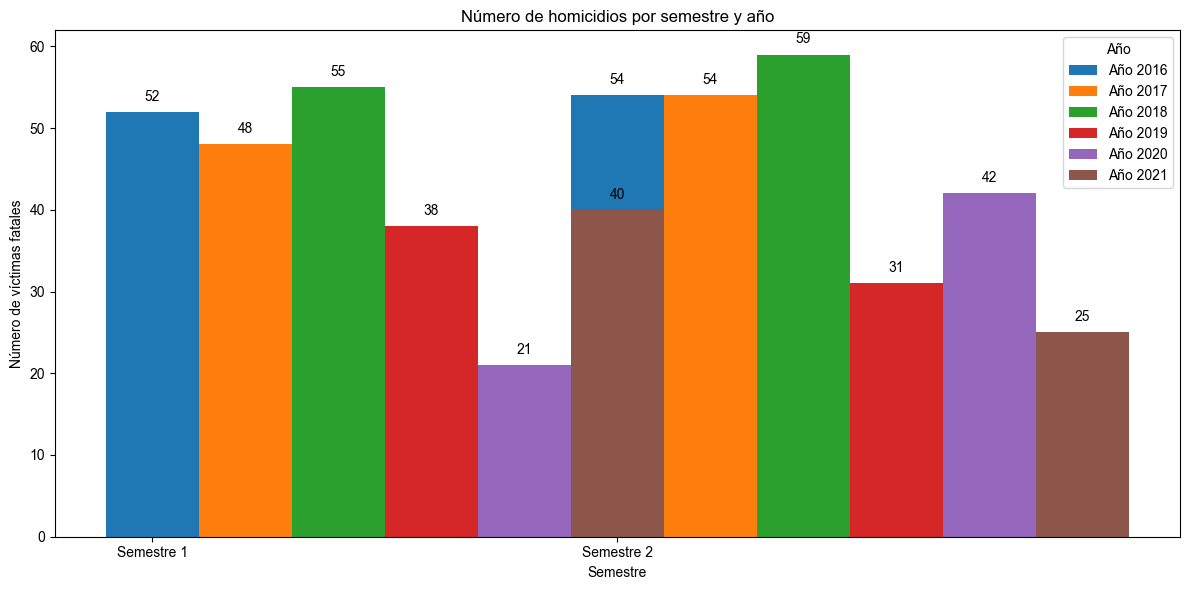

In [97]:

homicidios_por_semestre_ano = pd.DataFrame({
    'AÑO': [2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2020, 2020, 2021, 2021],
    'SEMESTRE': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'N_VICTIMAS': [52, 54, 48, 54, 55, 59, 38, 31, 21, 42, 40, 25]
})
# Crear gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
width = 0.2  # Ancho de las barras
# Posición de las barras
for idx, año in enumerate(homicidios_por_semestre_ano['AÑO'].unique()):
    data = homicidios_por_semestre_ano[homicidios_por_semestre_ano['AÑO'] == año]
    # Desplazamiento de las barras para cada año
    bars = plt.bar(data['SEMESTRE'] + width * idx, data['N_VICTIMAS'], label=f'Año {año}', width=width)
    # Añadir etiquetas sobre las barras (número de víctimas)
    for bar in bars:
        yval = bar.get_height()  # Obtener la altura de la barra (número de víctimas)
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  # Posicionar el texto sobre la barra
                 f'{int(yval)}', ha='center', va='bottom', fontsize=10)  # Añadir el texto

# Ajustar etiquetas del eje x para mostrar los semestres correctamente
plt.xticks([1, 2], ['Semestre 1', 'Semestre 2'])

# Añadir etiquetas y título
plt.xlabel('Semestre')
plt.ylabel('Número de víctimas fatales')
plt.title('Número de homicidios por semestre y año')
plt.legend(title='Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [98]:
homicidios_por_semestre_ano

,AÑO,SEMESTRE,N_VICTIMAS
0,2016,1,52
1,2016,2,54
2,2017,1,48
3,2017,2,54
4,2018,1,55
5,2018,2,59
6,2019,1,38
7,2019,2,31
8,2020,1,21
9,2020,2,42


- A lo largo de los años, parece haber una ligera fluctuación en el número de víctimas fatales en siniestros viales. En los primeros semestres del los años estudiados se pueden observar una disminución en comparación con el segundo semestre. Esto sugiere que hay un patron en que los siniestros viales tienden a ser más frecuentes o graves en el segundo semestre del año.
********

In [101]:
homicidios = homicidios.rename(columns={ 'MM': 'MES'})

In [102]:
print(homicidios.columns)


Index(['N_VICTIMAS', 'FECHA', 'AAAA', 'MES', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'DIRECCIÓN DEL HECHO', 'COMUNA',
       'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


**Análisis la relación entre la variable temporal "MES" y la variable  "N_VICTIMAS"**

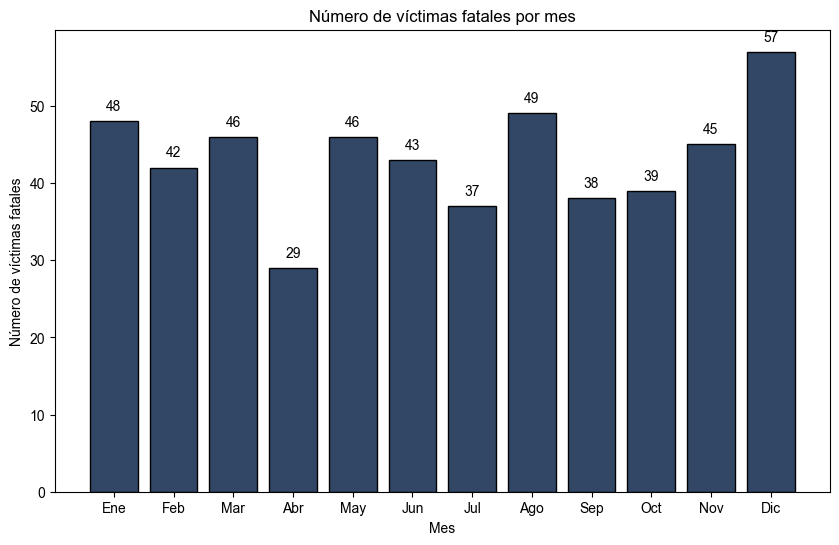

In [103]:
# Se Agrupan los homicidios por mes
homicidios_por_mes = homicidios.groupby('MES')['N_VICTIMAS'].sum().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(homicidios_por_mes['MES'], homicidios_por_mes['N_VICTIMAS'], color='#314765', edgecolor='black')

# Etiquetas y título
plt.title('Número de víctimas fatales por mes')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas fatales')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, 
             f'{int(yval)}', ha='center', va='bottom')  
plt.show()



In [104]:
homicidios_por_mes['N_VICTIMAS'].describe()

count    12.000000
mean     43.250000
std       7.085517
min      29.000000
25%      38.750000
50%      44.000000
75%      46.500000
max      57.000000
Name: N_VICTIMAS, dtype: float64

Análsis: En Diciembre fue el mes con el número más alto de víctimas fatales, posiblemente relacionado con el final del año y las festividades. En los meses de Enero y Agosto también fueron meses con un número significativo de víctimas, siendo notablemente más altos que los meses intermedios.
*****


**Análisis la relación entre la variable temporal "DIA" y la variable  "N_VICTIMAS"**

Se creara una columna "DIA_SEMANA" la cual nos permitira analizar cuales son los días de la semana que se presentan más accidentes, después se agrupara por los días laborales (lunes a Viernes) y los días no laborales (Sábado y Domingo)

In [105]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   N_VICTIMAS           504 non-null    int64         
 1   FECHA                504 non-null    datetime64[ns]
 2   AAAA                 504 non-null    int64         
 3   MES                  504 non-null    int64         
 4   DD                   504 non-null    int64         
 5   HORA                 504 non-null    object        
 6   HH                   504 non-null    int64         
 7   LUGAR_DEL_HECHO      504 non-null    object        
 8   TIPO_DE_CALLE        504 non-null    object        
 9   DIRECCIÓN DEL HECHO  504 non-null    object        
 10  COMUNA               504 non-null    int64         
 11  pos x                504 non-null    float64       
 12  pos y                504 non-null    float64       
 13  PARTICIPANTES        504 non-null  

In [106]:
# Cambiar la localización a español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [107]:
# Se crea la columna
homicidios['DIA_SEMANA'] = homicidios['FECHA'].dt.day_name(locale='es_ES')
# Se agrupa por día de la semana y se suman las víctimas
victimas_por_dia = homicidios.groupby('DIA_SEMANA')['N_VICTIMAS'].sum().reset_index()
dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
victimas_por_dia['DIA_SEMANA'] = pd.Categorical(victimas_por_dia['DIA_SEMANA'], categories=dias_ordenados, ordered=True)
victimas_por_dia = victimas_por_dia.sort_values('DIA_SEMANA')
print(victimas_por_dia)

  DIA_SEMANA  N_VICTIMAS
2      Lunes          73
3     Martes          69
4  Miércoles          69
1     Jueves          69
6    Viernes          79
5     Sábado          80
0    Domingo          80


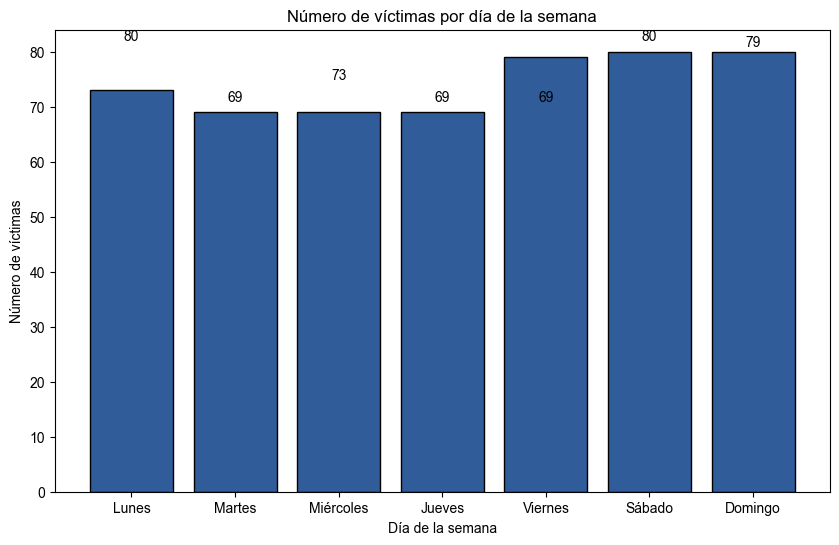

In [108]:
# Se grafica
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_dia['DIA_SEMANA'], victimas_por_dia['N_VICTIMAS'], color='#305d9a', edgecolor='black')

plt.xlabel('Día de la semana')
plt.ylabel('Número de víctimas')
plt.title('Número de víctimas por día de la semana')

for index, row in victimas_por_dia.iterrows():
    plt.text(x=row.name, y=row['N_VICTIMAS'] + 2, s=row['N_VICTIMAS'], ha='center')
plt.show()





Se puede concluir que los días de la semana con más siniestros viales son : Viernes, Sábado y Domingo, en comparación con otros días de la semana, esto puede estar asociado a la mayor cantidad de tráfico y puede influir también actividades de ocio, sumado al consumo de alcohol y drogas.
*****

**Análisis la relación entre la variable temporal "HORA" y la variable  "N_VICTIMAS"**

Voy a agrupar los horarios en horas laborales y no laborales, para mas claridad en el análisis. 

In [109]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   N_VICTIMAS           504 non-null    int64         
 1   FECHA                504 non-null    datetime64[ns]
 2   AAAA                 504 non-null    int64         
 3   MES                  504 non-null    int64         
 4   DD                   504 non-null    int64         
 5   HORA                 504 non-null    object        
 6   HH                   504 non-null    int64         
 7   LUGAR_DEL_HECHO      504 non-null    object        
 8   TIPO_DE_CALLE        504 non-null    object        
 9   DIRECCIÓN DEL HECHO  504 non-null    object        
 10  COMUNA               504 non-null    int64         
 11  pos x                504 non-null    float64       
 12  pos y                504 non-null    float64       
 13  PARTICIPANTES        504 non-null  

In [110]:
print(homicidios['HH'].dtype)


int64


In [111]:
print(homicidios['HH'].unique())

[ 4  1  5 18 19 15 22 16  9 23  6  7 10 17 12  0 11  8 21 20 14  3  2 13]


In [112]:
# Comprobar el rango de valores en HORA
print(homicidios['HH'].describe())

count    504.000000
mean      11.771825
std        6.855330
min        0.000000
25%        6.000000
50%       11.000000
75%       18.000000
max       23.000000
Name: HH, dtype: float64


In [113]:

# Clasificar las horas en laborales y no laborales
homicidios['Tipo_Hora'] = homicidios['HH'].apply(
    lambda x: 'Laboral' if (7 <= x < 12) or (14 <= x < 19) else 'No Laboral'
)

# Agrupar por hora y tipo de hora y sumar las víctimas
victimas_por_hora = homicidios.groupby(['HH', 'Tipo_Hora'])['N_VICTIMAS'].sum().reset_index()

# Mostrar el resultado
print(victimas_por_hora)

    HH   Tipo_Hora  N_VICTIMAS
0    0  No Laboral          17
1    1  No Laboral          18
2    2  No Laboral          15
3    3  No Laboral          21
4    4  No Laboral          19
5    5  No Laboral          28
6    6  No Laboral          30
7    7     Laboral          26
8    8     Laboral          23
9    9     Laboral          28
10  10     Laboral          25
11  11     Laboral          21
12  12  No Laboral          18
13  13  No Laboral           7
14  14     Laboral          25
15  15     Laboral          18
16  16     Laboral          23
17  17     Laboral          19
18  18     Laboral          25
19  19  No Laboral          22
20  20  No Laboral          20
21  21  No Laboral          23
22  22  No Laboral          24
23  23  No Laboral          24


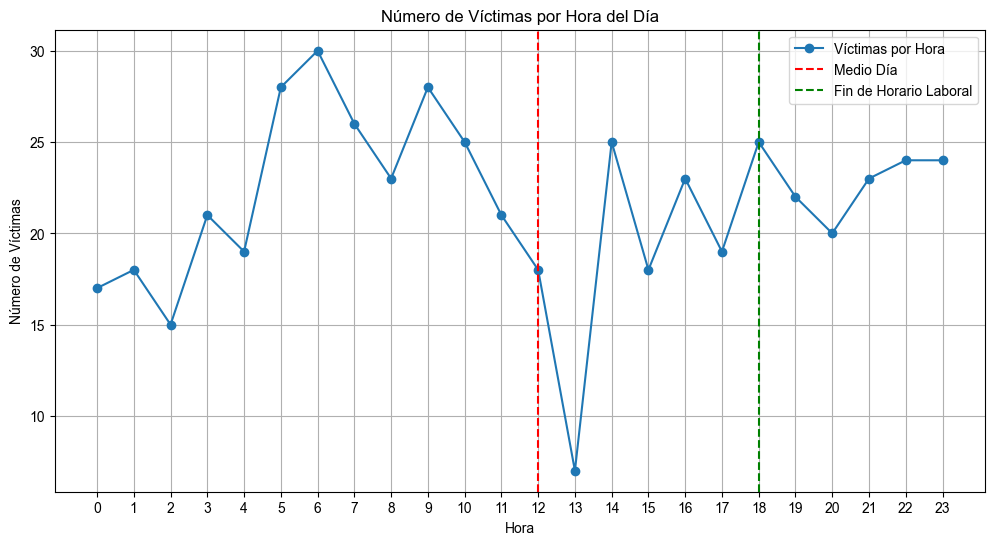

In [114]:
# Sumar víctimas por tipo de hora
victimas_totales = victimas_por_hora.groupby('Tipo_Hora')['N_VICTIMAS'].sum().reset_index()

# Visualización de los datos 
plt.figure(figsize=(12, 6))
plt.plot(victimas_por_hora['HH'], victimas_por_hora['N_VICTIMAS'], marker='o', label='Víctimas por Hora')
plt.title('Número de Víctimas por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Víctimas')
plt.xticks(range(24))  # Para mostrar todas las horas del día
plt.grid()
plt.legend(title='Tipo de Hora')
plt.axvline(x=12, color='r', linestyle='--', label='Medio Día')  # Línea para el medio día
plt.axvline(x=18, color='g', linestyle='--', label='Fin de Horario Laboral')  # Línea para el fin del horario laboral
plt.legend()
plt.show()

Suponiendo que el horario laboral esta entre las 7 hasta las 12, y de 14 hasta las 18, se nota que hay aumento de víctimas fatales en horas no laborales antes de entrar al trabajo o a la escuela. El pico de víctimas baja a la hora el almuerzo considerablemente y  aumenta a la hora de entrar de nuevo al trabajo, fluctuando hasta la hora de salida, aumentando y bajando hasta estacionarse.
*******

####  **Relación Variables de Espacio - Variable Dependiente N_VICTIMAS** 

*** Análisis entre la variable "DIRECCION_HECHO" y la variable "N_VICTIMAS"

In [115]:
# Se agrupa y se suma las víctimas
victimas_por_direccion = homicidios.groupby('DIRECCIÓN DEL HECHO')['N_VICTIMAS'].sum().reset_index()

# Filtrar las 10 direcciones con más víctimas
top_10_direcciones = victimas_por_direccion.nlargest(10, 'N_VICTIMAS')
top_10_direcciones

,DIRECCIÓN DEL HECHO,N_VICTIMAS
326,"PAZ, GRAL. AV. y BALBIN, RICARDO, DR. AV.",4
5,27 DE FEBRERO AV. y ESCALADA AV.,3
12,"ACHAVAL RODRIGUEZ, T., DR. AV. y VILLAFLOR, AZ...",3
27,"ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO",3
112,"CASTILLO, RAMON S., PRES. AV. y CALLE 12 (NO O...",3
167,"DEL LIBERTADOR AV. y RAMOS MEJIA, JOSE MARIA, ...",3
229,"INDEPENDENCIA AV. y CEVALLOS, VIRREY",3
331,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",3
332,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",3
22,"ALBERDI, JUAN BAUTISTA AV. y GUARDIA NACIONAL",2


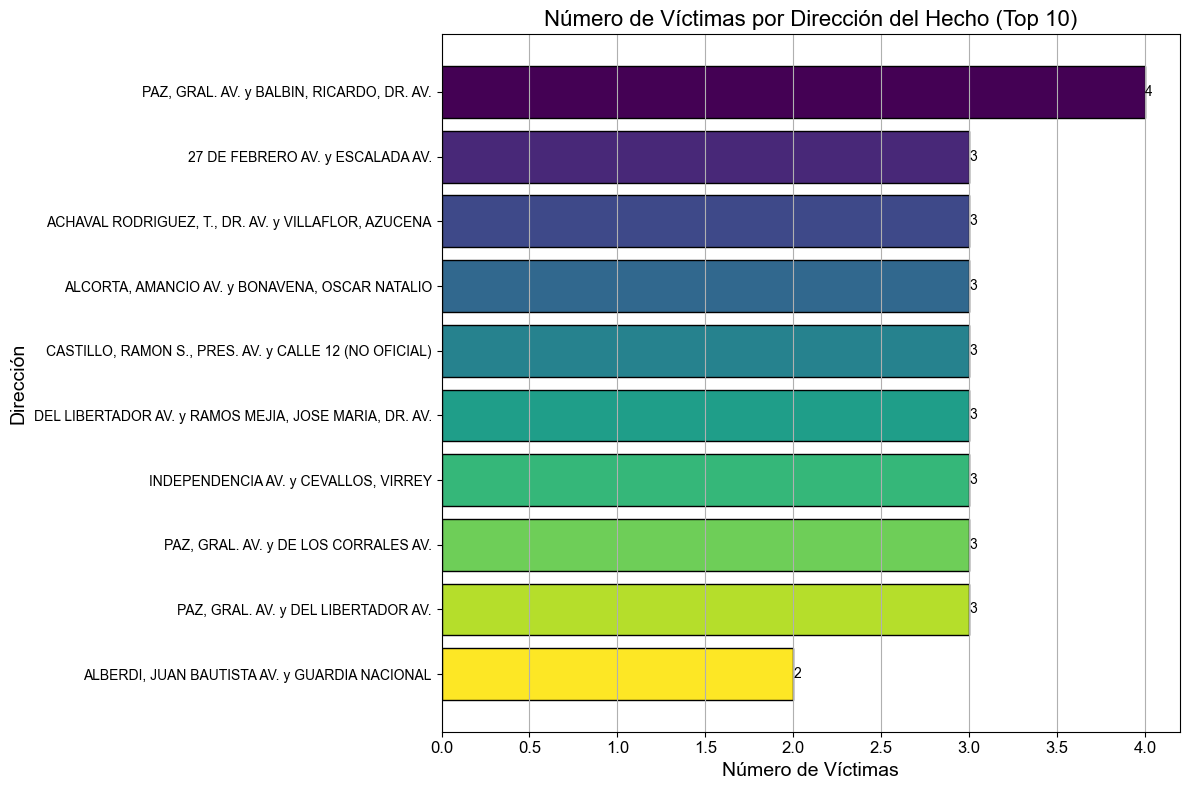

In [116]:
#Se visualizan los datos
top_10_direcciones = top_10_direcciones.sort_values(by='N_VICTIMAS', ascending=False)

plt.figure(figsize=(12, 8))  
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_direcciones))) 
bars = plt.barh(top_10_direcciones['DIRECCIÓN DEL HECHO'], 
                 top_10_direcciones['N_VICTIMAS'], 
                 color=colors, 
                 edgecolor='black') 
plt.title('Número de Víctimas por Dirección del Hecho (Top 10)', fontsize=16) 
plt.xlabel('Número de Víctimas', fontsize=14)
plt.ylabel('Dirección', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='x')
# Añadir etiquetas sobre las barras
for bar in bars:
    plt.text(bar.get_width(), 
             bar.get_y() + bar.get_height() / 2, 
             int(bar.get_width()), 
             ha='left', 
             va='center', 
             fontsize=10)
plt.gca().invert_yaxis()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

La repetición de algunas direcciones en la lista como "PAZ, GRAL. AV." Sugiere que puede haber patrones en la ocurrencia de víctimas fatales. Se pude inferir que es una avenida muy transitada por vehículos y peatones.

**Análisis entre la variable "TIPO_DE_CALLE" y la variable "N_VICTIMAS"**

In [117]:
# Agrupar por tipo de calle y sumar las víctimas
victimas_por_tipo_calle = homicidios.groupby('TIPO_DE_CALLE')['N_VICTIMAS'].sum().reset_index()

# Filtrar por los 10 tipos de calle con más víctimas
victimas_por_tipo_calle = victimas_por_tipo_calle.sort_values(by='N_VICTIMAS', ascending=False).head(10)
victimas_por_tipo_calle

,TIPO_DE_CALLE,N_VICTIMAS
1,AVENIDA,353
2,CALLE,89
3,GRAL PAZ,51
0,AUTOPISTA,26


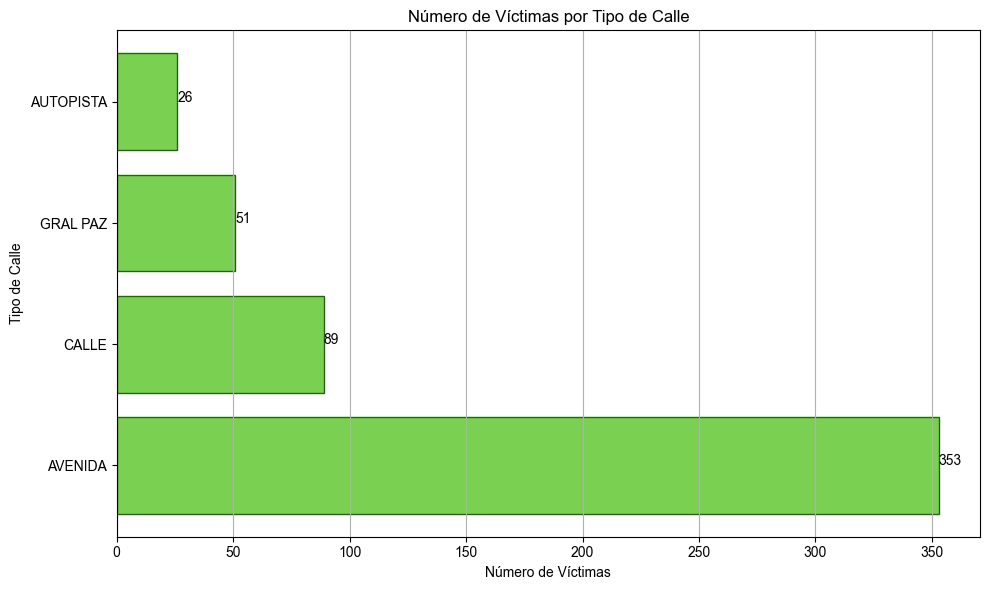

In [118]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(victimas_por_tipo_calle['TIPO_DE_CALLE'], victimas_por_tipo_calle['N_VICTIMAS'], color=plt.get_cmap('viridis')(0.8), edgecolor='#20660b')
plt.title('Número de Víctimas por Tipo de Calle')
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Calle')
plt.grid(axis='x')

# Añadir etiquetas a las barras
for index, value in enumerate(victimas_por_tipo_calle['N_VICTIMAS']):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Las avenidas parece ser la infraestructura vía donde más se presentan accidentes fatales y  esto se concuerda con el análsis de la gráfica anterior donde la avenida "PAZ, GRAL." presentaba más víctimas. 
******* 

####  **Relación Variables Categóricas - Variable Dependiente N_VICTIMAS** 

**Análisis de la variable "PARTICIPANTES" y la variable "N_VICTIMAS"**

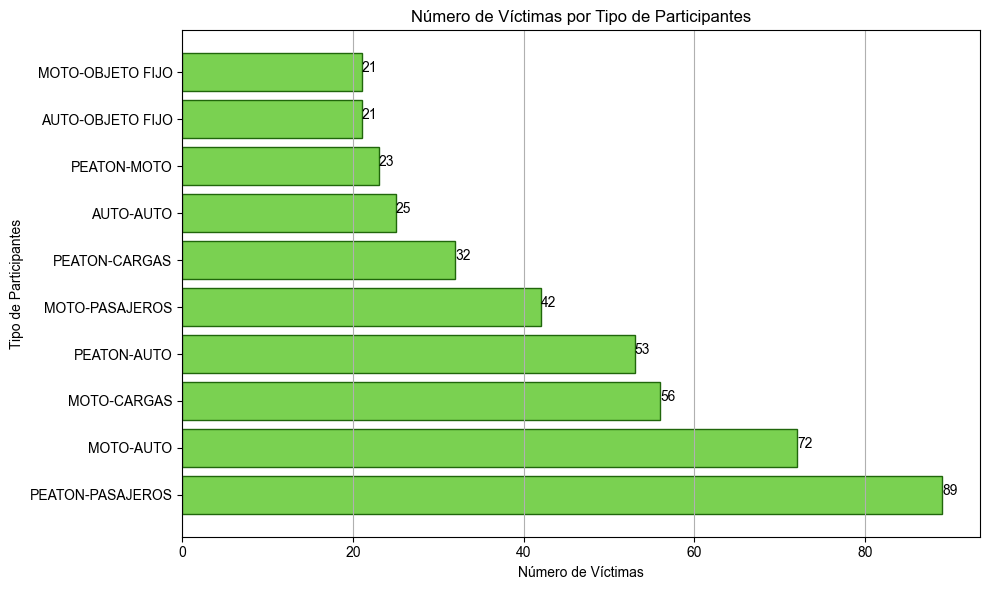

       PARTICIPANTES  N_VICTIMAS
29  PEATON-PASAJEROS          89
12         MOTO-AUTO          72
14       MOTO-CARGAS          56
25       PEATON-AUTO          53
19    MOTO-PASAJEROS          42
27     PEATON-CARGAS          32
0          AUTO-AUTO          25
28       PEATON-MOTO          23
3   AUTO-OBJETO FIJO          21
17  MOTO-OBJETO FIJO          21


In [119]:
# Agrupar por participantes y sumar las víctimas
victimas_por_participante = homicidios.groupby('PARTICIPANTES')['N_VICTIMAS'].sum().reset_index()

# Filtrar por los 10 tipos de participantes con más víctimas
victimas_por_participante = victimas_por_participante.sort_values(by='N_VICTIMAS', ascending=False).head(10)

# Visualización de datos
plt.figure(figsize=(10, 6))
plt.barh(victimas_por_participante['PARTICIPANTES'], victimas_por_participante['N_VICTIMAS'], color=plt.get_cmap('viridis')(0.8), edgecolor='#20660b')
plt.title('Número de Víctimas por Tipo de Participantes')
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Participantes')
plt.grid(axis='x')

# Añadir etiquetas a las barras
for index, value in enumerate(victimas_por_participante['N_VICTIMAS']):
    plt.text(value, index, str(value))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar el DataFrame resultante
print(victimas_por_participante)


El grupo con el mayor número de víctimas es "PEATON-PASAJEROS" con 89 víctimas, seguido de "MOTO-AUTO" teniendo 72 víctimas. Esto sugiere que los peatones son especialmente vulnerables en los accidentes de tráfico y  que los accidentes que involucran motocicletas y automóviles son una preocupación importante en términos de seguridad vial.




**Análisis de la variable "VICTIMA" y la variable "N_VICTIMAS"**

In [120]:
# Calcular el total de víctimas por tipo
total_victimas = homicidios.groupby('VICTIMA')['N_VICTIMAS'].sum().reset_index()
# Ordenar de mayor a menor
total_victimas = total_victimas.sort_values(by='N_VICTIMAS', ascending=False)

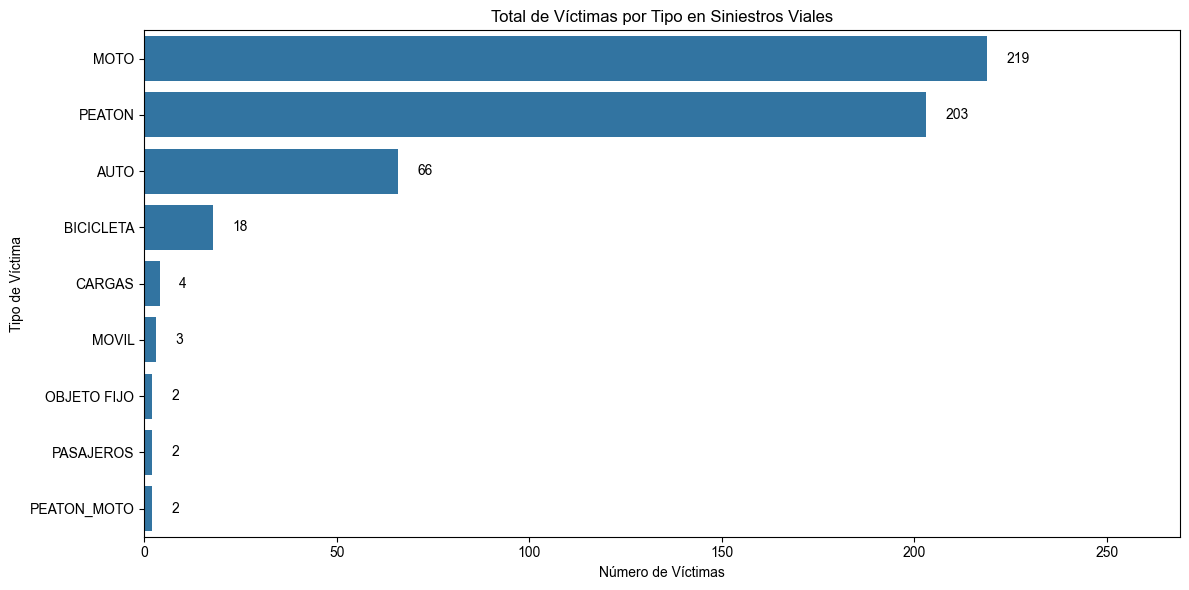

,VICTIMA,N_VICTIMAS
3,MOTO,219
7,PEATON,203
0,AUTO,66
1,BICICLETA,18
2,CARGAS,4
4,MOVIL,3
5,OBJETO FIJO,2
6,PASAJEROS,2
8,PEATON_MOTO,2


In [121]:

plt.figure(figsize=(12, 6))
sns.barplot(x='N_VICTIMAS', y='VICTIMA', data=total_victimas, legend=False)

# Añadir etiquetas y título
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Víctima')
plt.title('Total de Víctimas por Tipo en Siniestros Viales')
plt.xlim(0, total_victimas['N_VICTIMAS'].max() + 50)  # Ajustar el límite del eje x

# Añadir etiquetas encima de las barras
for index, value in enumerate(total_victimas['N_VICTIMAS']):
    plt.text(value + 5, index, str(value), va='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
total_victimas

Los datos presentan un recuento de víctimas por tipo de incidente, destacando que los motociclistas son el grupo más afectado, con 219 víctimas, seguido por peatones con 203. Se podría deducir que en La ciudad de Buenos Aires hay gran cantidad de motos y que las interacciones entre motociclistas y peatones pueden ser un área crítica para la segurida vial de la ciudad

**Análisis de la variable "ACUSADO" y la variable "N_VICTIMAS"**

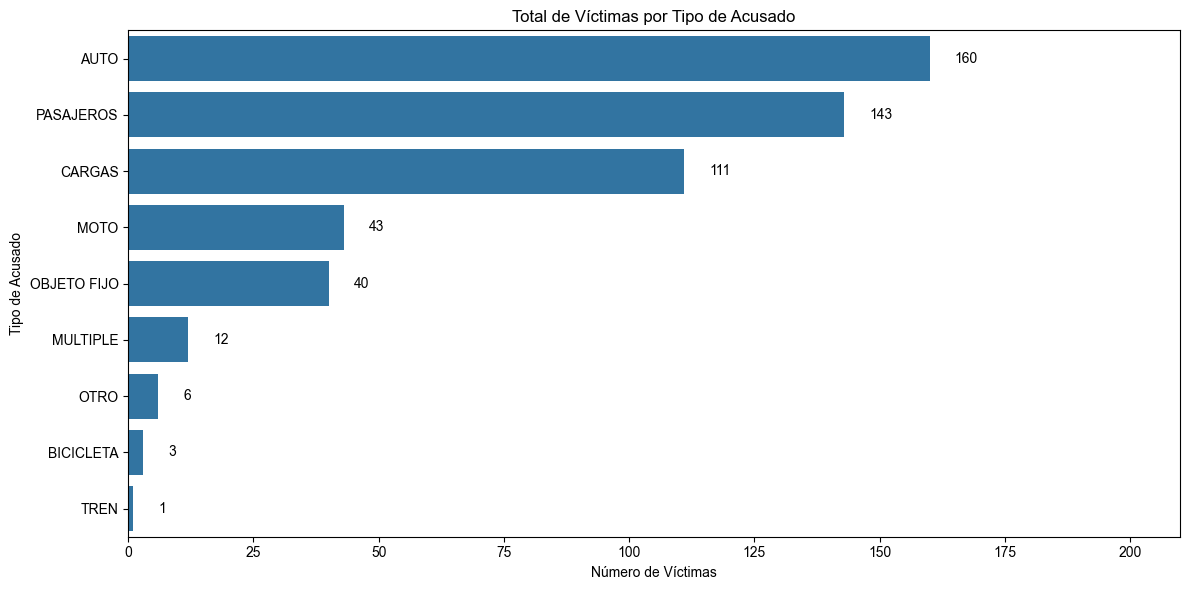

       ACUSADO  N_VICTIMAS
0         AUTO         160
7    PASAJEROS         143
2       CARGAS         111
3         MOTO          43
5  OBJETO FIJO          40
4     MULTIPLE          12
6         OTRO           6
1    BICICLETA           3
8         TREN           1


In [122]:
# Agrupar y sumar las víctimas por tipo de acusado
victimas_por_acusado = homicidios.groupby('ACUSADO')['N_VICTIMAS'].sum().reset_index()

# Ordenar los datos de forma descendente
victimas_por_acusado = victimas_por_acusado.sort_values(by='N_VICTIMAS', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='N_VICTIMAS', y='ACUSADO', data=victimas_por_acusado, legend=False)

# Añadir etiquetas y título
plt.xlabel('Número de Víctimas')
plt.ylabel('Tipo de Acusado')
plt.title('Total de Víctimas por Tipo de Acusado')
plt.xlim(0, victimas_por_acusado['N_VICTIMAS'].max() + 50)

# Añadir etiquetas encima de las barras
for index, value in enumerate(victimas_por_acusado['N_VICTIMAS']):
    plt.text(value + 5, index, str(value), va='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar el DataFrame ordenado
print(victimas_por_acusado)

Los datos reflejan la distribución del número de víctimas según el tipo de acusado en incidentes reportados. La categoría AUTO representa la mayor cantidad de víctimas, con 160 casos, lo que sugiere que este tipo de acusado es el más frecuente o responsable en los incidentes analizados. PASAJEROS le sigue con 143 víctimas, lo que indica que el comportamiento o las acciones de los pasajeros también contribuyen significativamente a la cantidad de víctimas.
*******
*******

# 4.3 Análisis Multivariado

**Teniendo los análisis bivariados de las variables independientes con la variable dependiente, se realizará un análisis multivariado de variables que considero críticas por semestre de 2019, esto para verificar si la disminución de la tasa de homicidios en siniestros viales del II semestre respecto al I semestre es factible.**

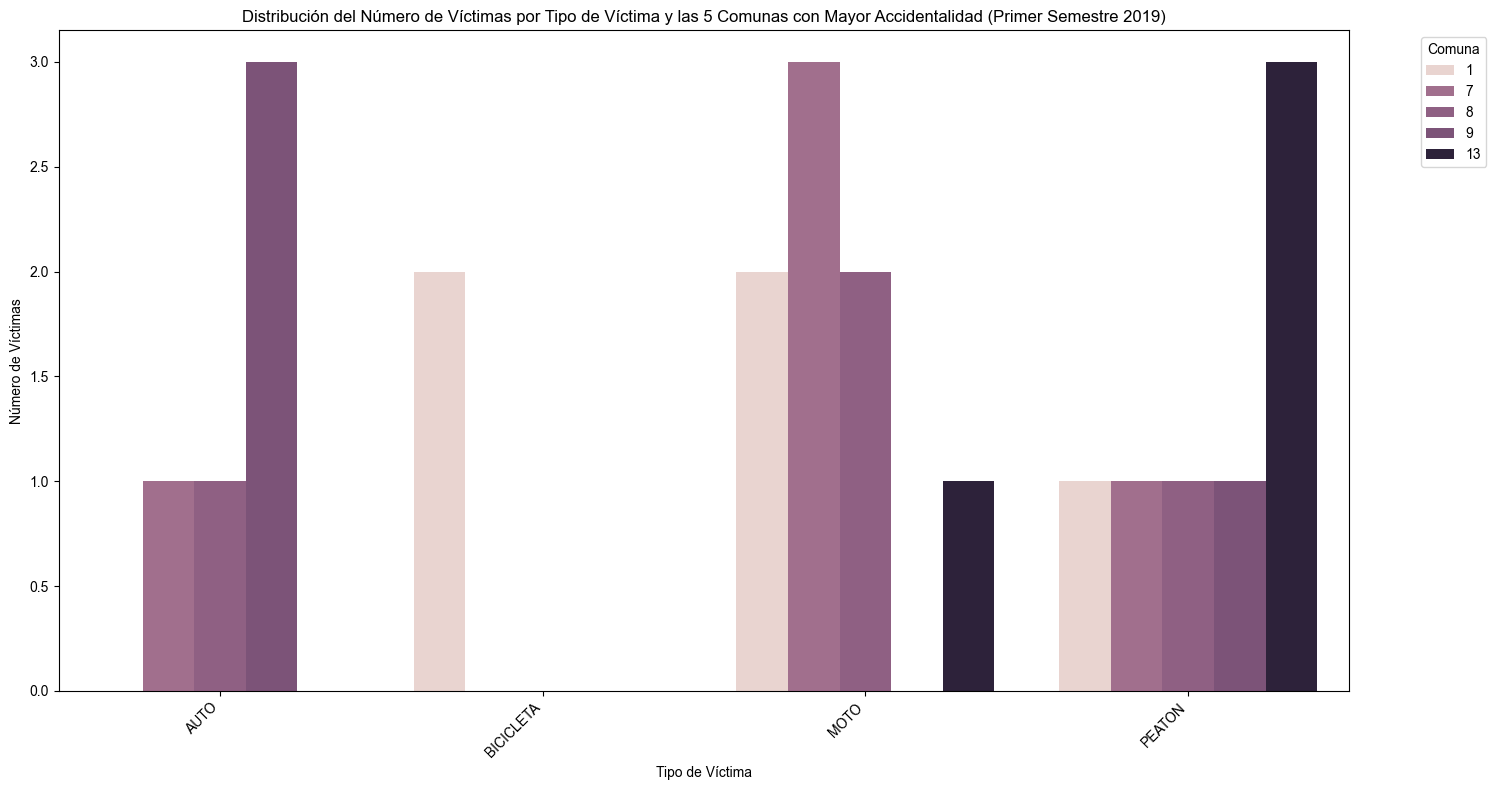

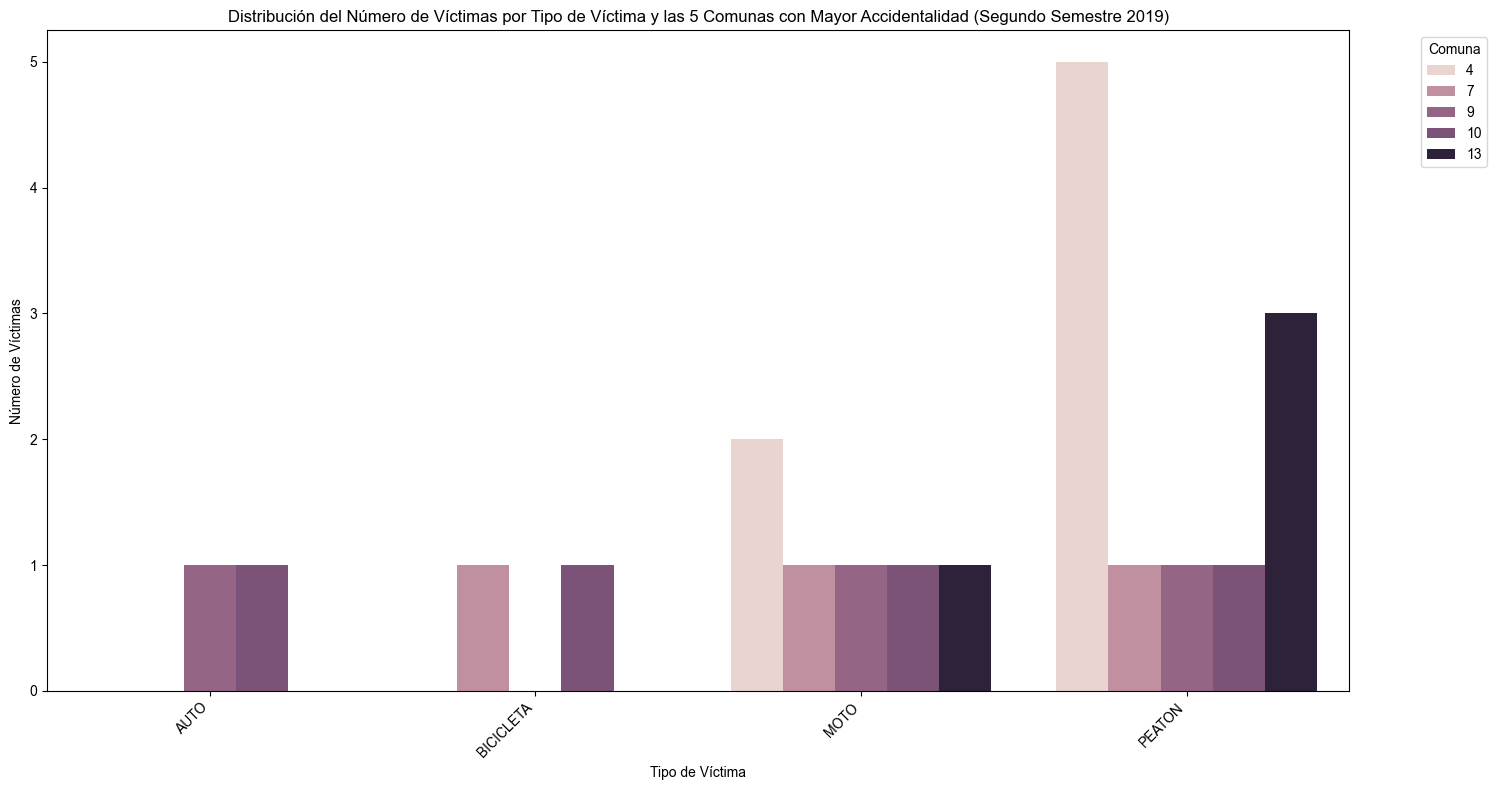

In [123]:

# Filtrar homicidios para el primer semestre y segundo de 2019
homicidios_primer_semestre = homicidios[(homicidios['FECHA'].dt.year == 2019) & (homicidios['FECHA'].dt.month <= 6)]
homicidios_segundo_semestre = homicidios[(homicidios['FECHA'].dt.year == 2019) & (homicidios['FECHA'].dt.month > 6)]
# Agrupar por 'COMUNA' y contar 'N_VICTIMAS' para el primer semestre
victimas_por_comuna_primer = homicidios_primer_semestre.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
top_comunas_primer = victimas_por_comuna_primer.nlargest(5, 'N_VICTIMAS')['COMUNA'].values
# Filtrar el dataset original del primer semestre por las comunas seleccionadas
filtered_data_primer = homicidios_primer_semestre[homicidios_primer_semestre['COMUNA'].isin(top_comunas_primer)]
# Agrupar por 'VICTIMA' y 'COMUNA' y contar 'N_VICTIMAS' para el primer semestre
grouped_data_primer = filtered_data_primer.groupby(['VICTIMA', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()
# Agrupar por 'COMUNA' y contar 'N_VICTIMAS' para el segundo semestre
victimas_por_comuna_segundo = homicidios_segundo_semestre.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
top_comunas_segundo = victimas_por_comuna_segundo.nlargest(5, 'N_VICTIMAS')['COMUNA'].values
# Filtrar el dataset original del segundo semestre por las comunas seleccionadas
filtered_data_segundo = homicidios_segundo_semestre[homicidios_segundo_semestre['COMUNA'].isin(top_comunas_segundo)]
# Agrupar por 'VICTIMA' y 'COMUNA' y contar 'N_VICTIMAS' para el segundo semestre
grouped_data_segundo = filtered_data_segundo.groupby(['VICTIMA', 'COMUNA'])['N_VICTIMAS'].sum().reset_index()
# Visualización de datos del I semestre
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data_primer, x='VICTIMA', y='N_VICTIMAS', hue='COMUNA', errorbar=None)
plt.title('Distribución del Número de Víctimas por Tipo de Víctima y las 5 Comunas con Mayor Accidentalidad (Primer Semestre 2019)')
plt.ylabel('Número de Víctimas')
plt.xlabel('Tipo de Víctima')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Comuna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Visualización de datos del I semestre
plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data_segundo, x='VICTIMA', y='N_VICTIMAS', hue='COMUNA', errorbar=None)
plt.title('Distribución del Número de Víctimas por Tipo de Víctima y las 5 Comunas con Mayor Accidentalidad (Segundo Semestre 2019)')
plt.ylabel('Número de Víctimas')
plt.xlabel('Tipo de Víctima')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Comuna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Efectivamente en el segundo semestre del año 2019, se observa una disminución de victimas mortales en las comunas que más se presentaron estos casos, ademas se evidencia la reducción de los tipos de victimas como peatón, moto y auto. El comportamiento de la comuna 1 del segundo semestre con respecto al primer semestre es notablemente alto. Sin embargo de manera general se puede apreciar la disminución de homicidios. 
Acontinuación se realizara el análisis del KPI relacionado con esta reducción para la verificación de lo analizado en el dataset.
*******
*******

### **4.4 KPI : Reducir la tasa de homicidios en siniestros viales en un 10% entre el segunto semestre del año 2019 y el primer semestre del mismo año**

**Definir la Tasa de Homicidios en Siniestros Viales**

**1. Filtro los datos del I y II semestre de 2019 de la columna Fecha.**

In [124]:
homicidios['FECHA'] = pd.to_datetime(homicidios['FECHA'])  # Asegúrate de que la columna de fecha sea de tipo datetime

II_semestre_2019 = homicidios[(homicidios['FECHA'] >= '2019-07-01') & (homicidios['FECHA'] <= '2019-12-31')]

# Filtrar para el I semestre  (enero-junio de 2019)
I_semestre_2019 = homicidios[(homicidios['FECHA'] >= '2019-01-01') & (homicidios['FECHA'] <= '2019-06-30')]

**2.Obtengo la población total por comuna para cada semestre**

In [125]:
poblacion = pd.read_excel('poblacion por comuna 2010a2025.xls')


In [126]:
# Filtrar la poblacion por el año 2019
poblacion_2019 = poblacion[poblacion['Año/Comuna'] == 2019]
# Sumar todas las columnas correspondientes a las comunas
total_poblacion_2019 = poblacion_2019.iloc[:, 1:].sum(axis=1).values[0]
print(f'La población total de las comunas en 2019 es: {total_poblacion_2019}')
poblacion_semestre = total_poblacion_2019/ 2
print(f'La población total por semestre del año 2019 es: {poblacion_semestre}')

La población total de las comunas en 2019 es: 6144058
La población total por semestre del año 2019 es: 3072029.0


**3. Calcular la Tasa de Homicidios en Siniestros Viales**


**3.1 Calcular la Tasa de Homicidios en Siniestros Viales en el I semeste de 2019**


In [127]:
homicidios_I_semestre_2019 = homicidios[(homicidios['FECHA'] >= '2019-01-01') & (homicidios['FECHA'] <= '2019-06-30')]['N_VICTIMAS'].sum()
tasa_I_semestre = (homicidios_I_semestre_2019 / poblacion_semestre) * 100000
print(f'La Tasa de Homicidios en Siniestros Viales en el I semestre del año 2019 es: {tasa_I_semestre}')

La Tasa de Homicidios en Siniestros Viales en el I semestre del año 2019 es: 1.2369674895647145


**3.2 Calcular la Tasa de Homicidios en Siniestros Viales en el II semeste de 2019**

In [128]:
homicidios_II_semestre_2019 = homicidios[(homicidios['FECHA'] >= '2019-07-01') & (homicidios['FECHA'] <= '2019-12-31')]['N_VICTIMAS'].sum()
tasa_II_semestre = (homicidios_II_semestre_2019 / poblacion_semestre) * 100000
print(f'La Tasa de Homicidios en Siniestros Viales en el I semestre del año 2019 es: {tasa_II_semestre}')

La Tasa de Homicidios en Siniestros Viales en el I semestre del año 2019 es: 1.0091050572764775


Para determinar si hubo una reducción del 10% en la tasa de homicidios en siniestros viales durante el segundo semestre de 2019 en comparación con el primer semestre, debemos calcular el porcentaje de cambio entre ambas tasas.

In [129]:
Porcentaje_cambio = ((tasa_I_semestre - tasa_II_semestre) / tasa_I_semestre) * 100
print(f'La tasa de homicidios en siniestros viales en CABA durante el segundo semestre de 2019 se redujo aproximadamente: {Porcentaje_cambio} % en comparación con el primer semestre. Esto es una reducción mayor al 10%, por lo que la afirmación es correcta: hubo una reducción significativa de más del 10%.')

La tasa de homicidios en siniestros viales en CABA durante el segundo semestre de 2019 se redujo aproximadamente: 18.421052631578956 % en comparación con el primer semestre. Esto es una reducción mayor al 10%, por lo que la afirmación es correcta: hubo una reducción significativa de más del 10%.


### La tasa de homicidios en siniestros viales en CABA durante el segundo semestre de 2019 se redujo aproximadamente un **18.42%** en comparación con el primer semestre. Esto es una reducción mayor al 10%, por lo que la afirmación es correcta: hubo una reducción significativa de más del 10%.
*********
*********

In [130]:
homicidios

,N_VICTIMAS,FECHA,AAAA,MES,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,DIRECCIÓN DEL HECHO,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEMANA,Tipo_Hora
0,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Viernes,No Laboral
1,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,No Laboral
2,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEA,AVENIDA,"SAN JUAN AV. y SAENZ PEA, LUIS, PRES.",1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves,No Laboral
3,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV. y ESCALADA AV.,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,Domingo,Laboral
4,1,2016-01-24,2016,1,24,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,"NOGOYA y GONZALEZ, JOAQUIN V.",11,-58.500959,-34.608254,MOTO-AUTO,MOTO,AUTO,Domingo,No Laboral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,"BAIGORRIA y HUGO, VICTOR",10,-58.519894,-34.622849,MOTO-AUTO,MOTO,AUTO,Sábado,No Laboral
500,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,RIVADAVIA AV. y PUEYRREDON AV.,3,-58.405969,-34.610120,PEATON-AUTO,PEATON,AUTO,Domingo,No Laboral
501,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV. y MOM,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,Lunes,Laboral
502,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,Lunes,No Laboral


In [136]:
homicidios.to_excel('homicidios_analizado.xlsx', index=False, engine='openpyxl')  